In [1]:
# Imported necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
train_path = 'train_data.txt'
train_output_path = 'train_dataset.csv'
columns_train = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
df_train = pd.read_csv(train_path, sep=':::', header=None, names=columns_train, engine='python')
df_train.to_csv(train_output_path, index=False)

In [3]:
df_train.shape

(54214, 4)

In [4]:
df_train

,ID,TITLE,GENRE,DESCRIPTION
0,"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,"""54210","""""Bonino"""" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,"""54211",Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,"""54212",Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,"""54213",Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:
df_train=df_train.dropna()

In [6]:
df_train['ID'] = df_train['ID'].str.replace('"', '')

In [7]:
genre_counts=df_train.GENRE.value_counts()

In [8]:
genre_label_mapping = {genre: rank for rank, (genre, count) in enumerate(genre_counts.items(), start=1)}

In [9]:
df_train['Classify'] = df_train['GENRE'].map(genre_label_mapping)

In [10]:
df_train.GENRE.value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [11]:
df_train.Classify.value_counts()

Classify
1     13613
2     13096
3      7447
4      5073
5      2204
6      1591
7      1315
8      1032
9       884
10      784
11      775
12      731
13      672
14      647
15      590
16      505
17      498
18      432
19      391
20      323
21      319
22      277
23      265
24      243
25      194
26      181
27      132
Name: count, dtype: int64

In [12]:
df_train['DESCRIPTION'].head(54200)

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
54195     In this ""concept"" essay documentary, 16 par...
54196     Vulture Canyon is the only juvenile girls pri...
54197     Alex, a young woman aged 18, lives with her m...
54198     Ahmet Nurudin is a dervish and head of the Is...
54199     Follow the life of Stephen, a young man just ...
Name: DESCRIPTION, Length: 54200, dtype: object

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

vectorizer = TfidfVectorizer(max_features=120614)
X_train_tfidf = vectorizer.fit_transform(df_train['DESCRIPTION'])


In [14]:
X_train_tfidf

<54214x120614 sparse matrix of type '<class 'numpy.float64'>'
	with 3730990 stored elements in Compressed Sparse Row format>

In [15]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
DESCRIPTION , CLASSIFY = smote.fit_resample(X_train_tfidf,df_train['Classify'])

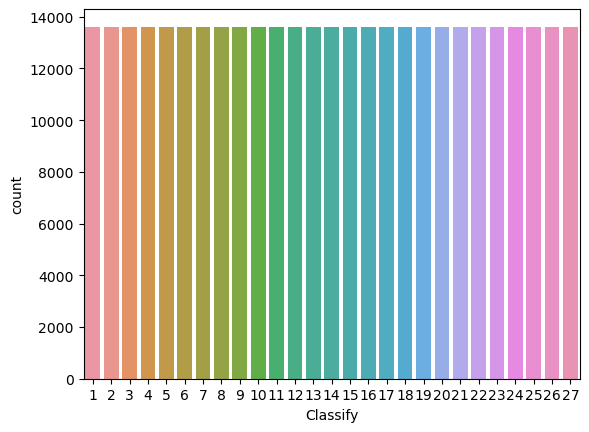

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=CLASSIFY)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    DESCRIPTION , 
    CLASSIFY, 
    test_size=0.2, 
    random_state=2022,
    stratify=CLASSIFY
)

In [19]:
y_train

331843    25
295167    22
195009    15
313446    23
317220    24
          ..
140595    10
300287    22
110193     8
305567    23
6467       2
Name: Classify, Length: 294040, dtype: int64

In [20]:
y_test

209651    16
345693    26
222716    17
138985    10
70346      5
          ..
262494    20
322980    24
209053    16
54512      2
65273      4
Name: Classify, Length: 73511, dtype: int64

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=MultinomialNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [22]:
y_pred

array([16, 26, 17, ..., 16,  2,  4], dtype=int64)

In [23]:
print(y_test)

209651    16
345693    26
222716    17
138985    10
70346      5
          ..
262494    20
322980    24
209053    16
54512      2
65273      4
Name: Classify, Length: 73511, dtype: int64


In [24]:

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.37      0.48      2723
           2       0.77      0.66      0.71      2723
           3       0.82      0.63      0.71      2722
           4       0.81      0.60      0.69      2723
           5       0.86      0.96      0.91      2722
           6       0.78      0.94      0.85      2722
           7       0.91      0.92      0.91      2723
           8       0.96      0.99      0.98      2722
           9       0.90      0.98      0.93      2723
          10       0.94      0.95      0.95      2723
          11       0.97      0.94      0.95      2722
          12       0.92      0.98      0.95      2723
          13       0.83      0.99      0.90      2722
          14       0.92      0.98      0.95      2723
          15       0.96      1.00      0.98      2723
          16       0.95      0.99      0.97      2722
          17       0.98      0.99      0.98      2723
          18       0.95    

In [25]:

from sklearn.naive_bayes import ComplementNB

# Create a pipeline object with Complement Naive Bayes
model2 = ComplementNB()

# Fit with X_train and y_train
model2.fit(X_train, y_train)

# Get predictions for X_test and store it in y_pred
y_pred_complement_nb = model2.predict(X_test)

# Print the classification report
print("Complement Naive Bayes:")
print(classification_report(y_test, y_pred_complement_nb))


Complement Naive Bayes:
              precision    recall  f1-score   support

           1       0.77      0.09      0.16      2723
           2       0.81      0.24      0.37      2723
           3       0.89      0.42      0.57      2722
           4       0.90      0.52      0.66      2723
           5       0.88      0.94      0.91      2722
           6       0.91      0.86      0.88      2722
           7       0.93      0.88      0.90      2723
           8       0.83      1.00      0.91      2722
           9       0.92      0.92      0.92      2723
          10       0.92      0.95      0.93      2723
          11       0.93      0.94      0.94      2722
          12       0.85      0.99      0.92      2723
          13       0.80      0.99      0.88      2722
          14       0.89      0.99      0.94      2723
          15       0.83      1.00      0.91      2723
          16       0.88      0.99      0.94      2722
          17       0.91      0.99      0.95      2723
   

In [26]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline object with Logistic Regression
model3 = LogisticRegression()

# Fit with X_train and y_train
model3.fit(X_train, y_train)

# Get predictions for X_test and store it in y_pred
y_pred_logistic = model3.predict(X_test)

# Print the classification report
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))


C:\Users\dell\Anaconda\envs\Machinelearning\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           1       0.67      0.54      0.60      2723
           2       0.79      0.75      0.77      2723
           3       0.77      0.75      0.76      2722
           4       0.79      0.69      0.74      2723
           5       0.95      0.94      0.95      2722
           6       0.92      0.94      0.93      2722
           7       0.93      0.97      0.95      2723
           8       0.99      0.99      0.99      2722
           9       0.96      0.98      0.97      2723
          10       0.96      0.98      0.97      2723
          11       0.98      0.98      0.98      2722
          12       0.96      0.99      0.98      2723
          13       0.94      0.99      0.96      2722
          14       0.97      1.00      0.98      2723
          15       0.98      1.00      0.99      2723
          16       0.97      1.00      0.98      2722
          17       0.98      1.00      0.99      2723
      

In [27]:
import joblib

joblib.dump(model, 'MultinomialNB.pkl')

['MultinomialNB.pkl']

In [28]:
joblib.dump(model2, 'ComplementNB.pkl')

['ComplementNB.pkl']

In [29]:
joblib.dump(model3, 'LogisticRegression.pkl')

['LogisticRegression.pkl']